In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_edgelist("data/advogato.txt")
G = G.to_undirected()
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
matrix = nx.adjacency_matrix(G).toarray()

In [2]:
n_values = range(1, 3)  # Valores de n para calcular A^n

In [3]:
# time 15m 17.8s
for n in n_values:
    An = np.linalg.matrix_power(matrix, n)

In [5]:
# time 1m 58.0s
eigenvalues, eigenvectors = np.linalg.eig(matrix)
eigenvectors_inv = np.linalg.inv(eigenvectors)
for n in n_values:
    Dn = np.diag(eigenvalues ** n)
    An = eigenvectors @ Dn @ eigenvectors_inv

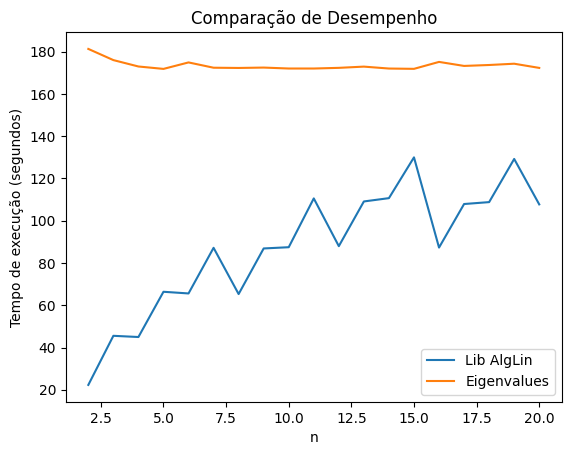

In [6]:
import numpy as np
import networkx as nx
import time
import matplotlib.pyplot as plt

N = 10000
matrix = 10*np.random.rand(N,N)

n_values = np.arange(2, 21)

execution_times_lib = []
execution_times_diagonal = []

eigenvalues, eigenvectors = np.linalg.eig(matrix)
eigenvectors_inv = np.linalg.inv(eigenvectors)

for n in n_values:
    start_time = time.time()
    matrix_power = np.linalg.matrix_power(matrix, n)
    end_time = time.time()
    execution_time_lib = end_time - start_time
    execution_times_lib.append(execution_time_lib)

    start_time = time.time()
    D_power = np.diag(eigenvalues ** n)
    M_power = np.real(eigenvectors @ D_power @ eigenvectors_inv)
    end_time = time.time()
    execution_time_diagonal = end_time - start_time
    execution_times_diagonal.append(execution_time_diagonal)
    
    #print(matrix_power)
    #print(M_power)

plt.plot(n_values, execution_times_lib, label='Lib AlgLin')
plt.plot(n_values, execution_times_diagonal, label='Eigenvalues')
plt.xlabel('n')
plt.ylabel('Tempo de execução (segundos)')
plt.title('Comparação de Desempenho')
plt.legend()
plt.show()

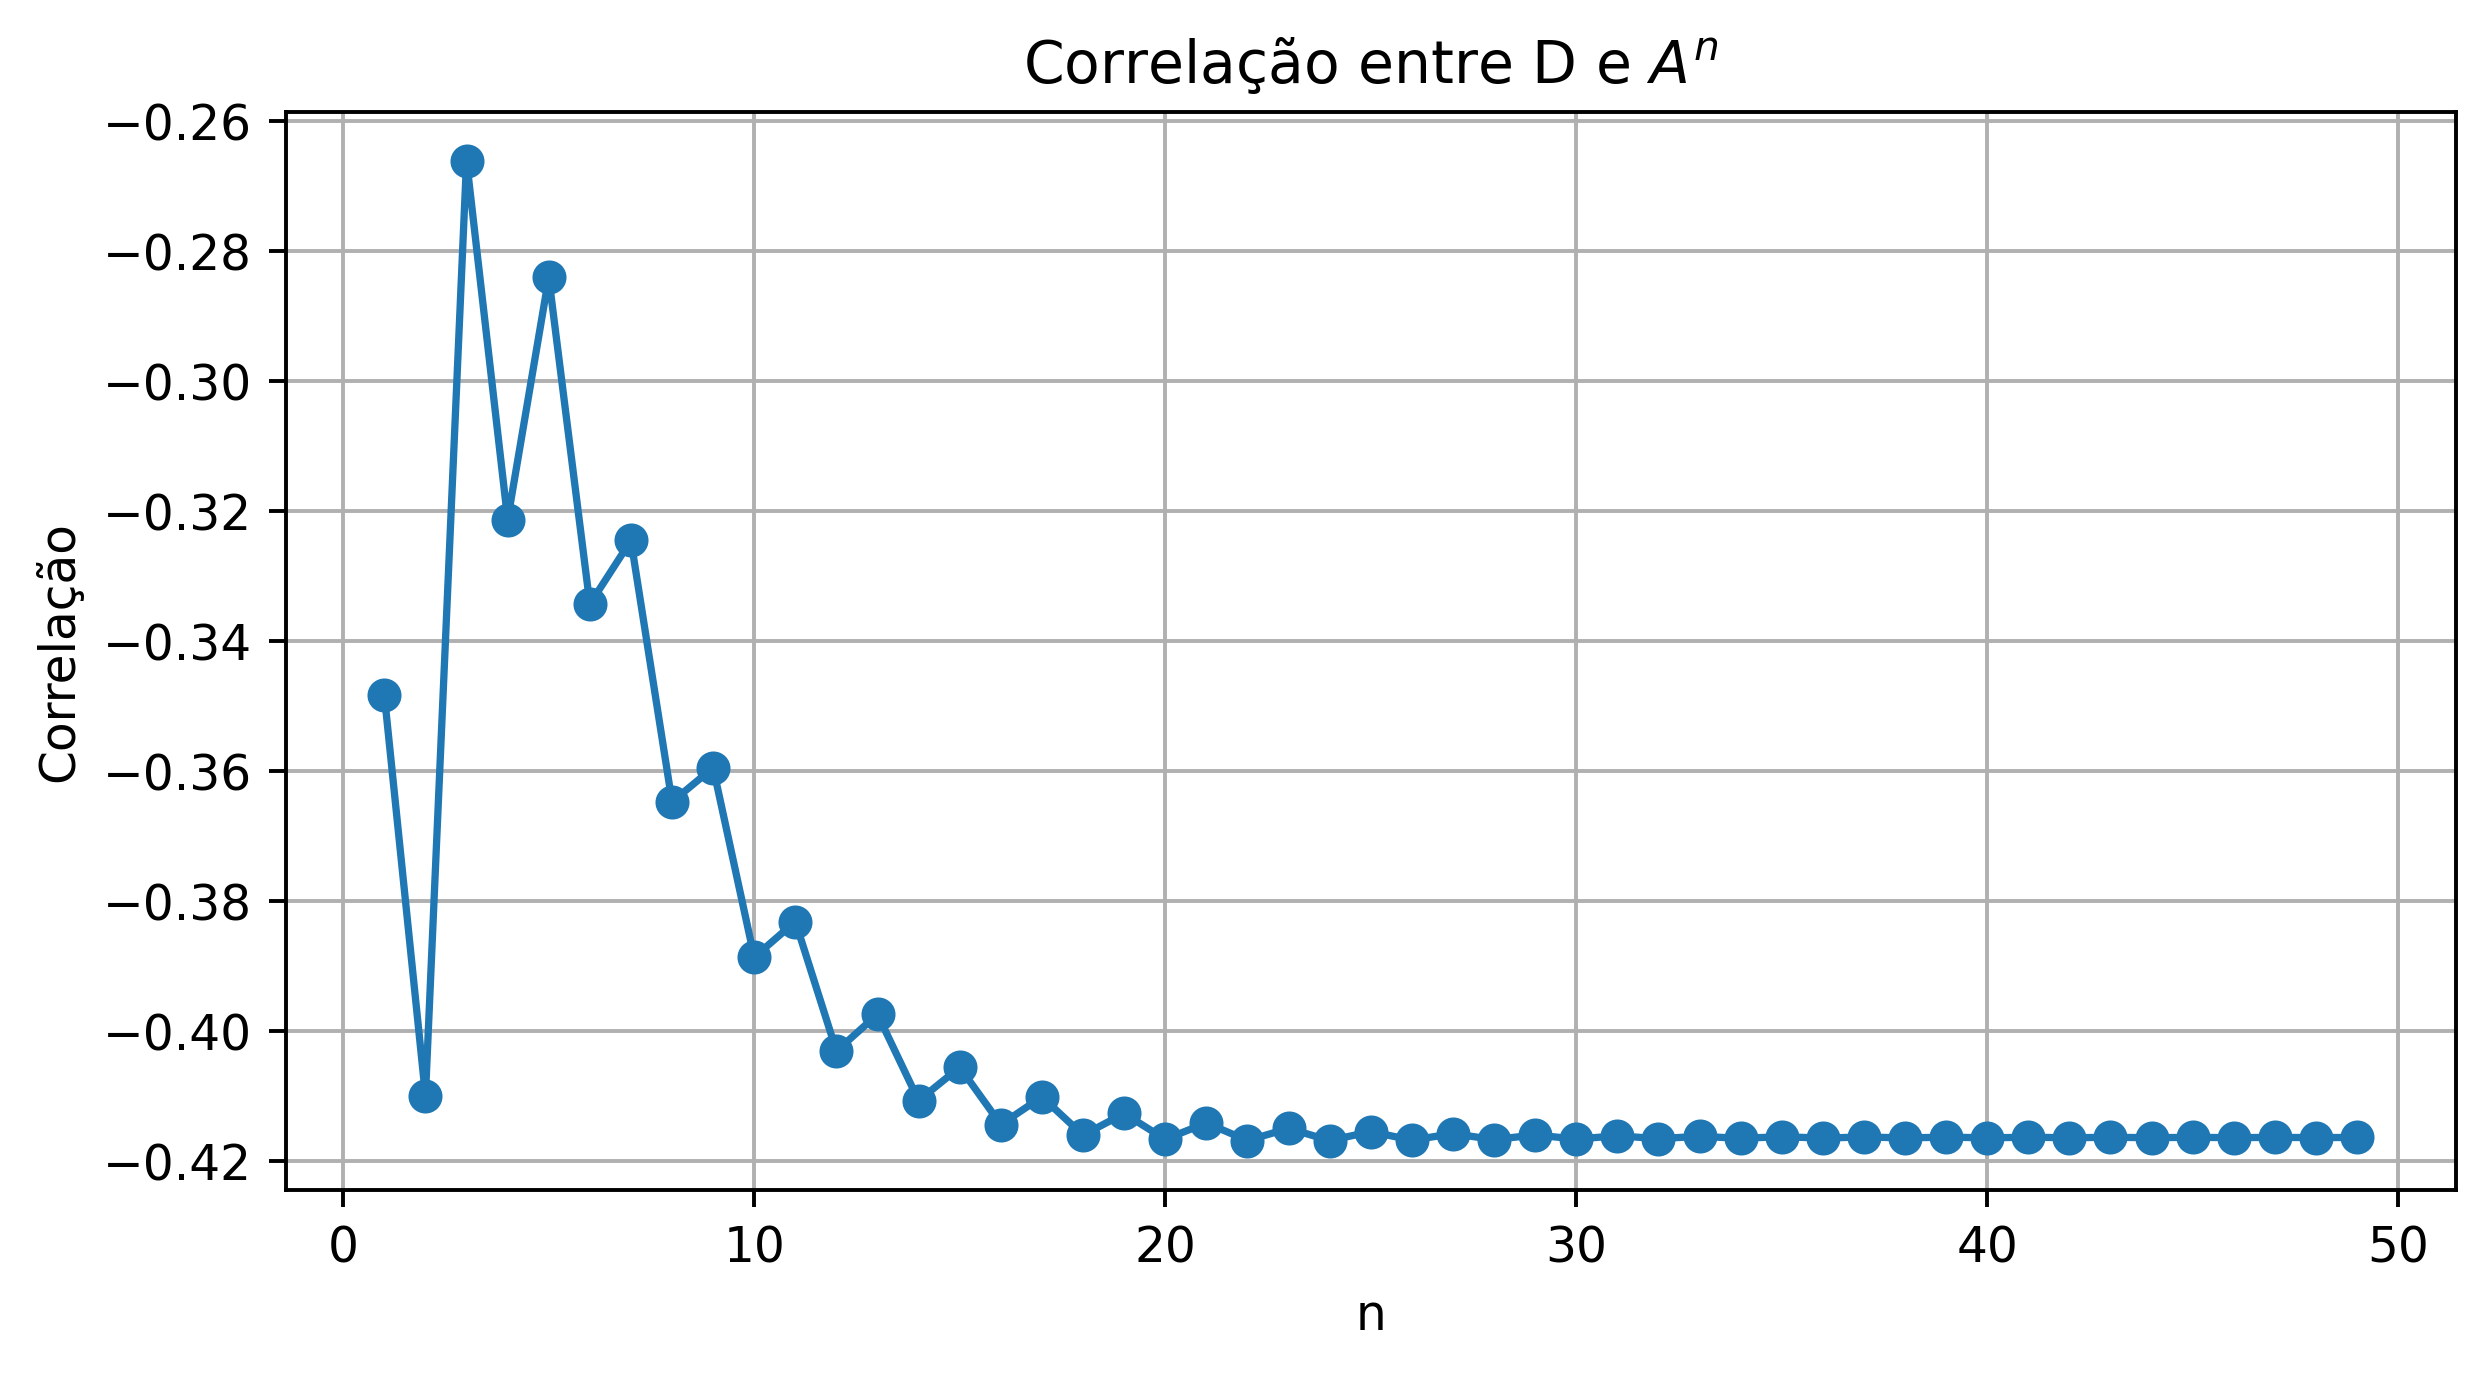

In [21]:
import numpy as np
import networkx as nx
from numpy  import *
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.csgraph as csgraph

# Matriz de adjacência do grafo.
A = np.array([
#    0  1  2  3  4  5  
    [0, 1, 0, 0, 1, 0], # 0
    [1, 0, 1, 0, 1, 0], # 1
    [0, 1, 0, 1, 0, 0], # 2
    [0, 0, 1, 0, 1, 1], # 3
    [1, 1, 0, 1, 0, 0], # 4
    [0, 0, 0, 1, 0, 0], # 5
    ]) 
# Gera grafo a partir da matriz de adjacência.
G = nx.from_numpy_array(np.array(A), create_using=nx.Graph)  
A = nx.adjacency_matrix(G).toarray()

adj_sparse = sp.csr_matrix(A)
D = csgraph.shortest_path(adj_sparse, method='D', directed=False)

# Calcula potênciação 
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvectors_inv = np.linalg.inv(eigenvectors)
correlations = []
n_values = range(1, 50)
for n in n_values:
    d_power = np.diag(eigenvalues ** n)
    A_power = eigenvectors @ d_power @ eigenvectors_inv
    correlation = np.corrcoef(D.flatten(), A_power.flatten())[0, 1]
    correlations.append(correlation)

# Plotar o gráfico da correlação
plt.figure(figsize=(8,4),dpi=350)
plt.plot(n_values, correlations, marker='o')
plt.xlabel('n')
plt.ylabel('Correlação')
plt.title('Correlação entre D e $A^n$')
plt.grid(True)
plt.show()

In [44]:
import numpy as np
import networkx as nx
from numpy  import *
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.csgraph as csgraph

# Matriz de adjacência do grafo.
A = np.array([
#    0  1  2  3  4  5  
    [0, 1, 0, 0, 1, 0], # 0
    [1, 0, 1, 0, 1, 0], # 1
    [0, 1, 0, 1, 0, 0], # 2
    [0, 0, 1, 0, 1, 1], # 3
    [1, 1, 0, 1, 0, 0], # 4
    [0, 0, 0, 1, 0, 0], # 5
    ]) 
# Gera grafo a partir da matriz de adjacência.
G = nx.from_numpy_array(np.array(A), create_using=nx.Graph)  
A = nx.adjacency_matrix(G).toarray()

adj_sparse = sp.csr_matrix(A)
D = csgraph.shortest_path(adj_sparse, method='D', directed=False)

print("D=")
print(D)

# Calcula potênciação 
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvectors_inv = matrix(np.linalg.inv(eigenvectors))

print("A=")
print(A)

print("eigenvalues")
print(eigenvalues)

test = matrix(eigenvectors) @ matrix(np.diag(eigenvalues)) @ eigenvectors_inv

print("test\n", test)
print("asint\n", test.astype(float).astype(int))

n_values = range(1, 5)
for n in n_values:
    d_power = np.diag(eigenvalues ** n)
    print(f"diag\n", d_power)
    A_power = np.linalg.matrix_power(A, n)
    #A_power = (eigenvectors @ d_power @ eigenvectors_inv).astype(int)
    print(f"A^{n}\n", A_power)
    correlation = np.corrcoef(D.flatten(), A_power.flatten())[0, 1]
    print(f"correlation={correlation}")

D=
[[0. 1. 2. 2. 1. 3.]
 [1. 0. 1. 2. 1. 3.]
 [2. 1. 0. 1. 2. 2.]
 [2. 2. 1. 0. 1. 1.]
 [1. 1. 2. 1. 0. 2.]
 [3. 3. 2. 1. 2. 0.]]
A=
[[0 1 0 0 1 0]
 [1 0 1 0 1 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 1]
 [1 1 0 1 0 0]
 [0 0 0 1 0 0]]
eigenvalues
[ 2.53948374 -2.13639304  1.08247361 -1.20607577 -0.54063225  0.2611437 ]
test
 [[ 1.22435150e-16  1.00000000e+00 -9.29316553e-17  6.80668205e-16
   1.00000000e+00 -2.33372446e-16]
 [ 1.00000000e+00  5.59464730e-16  1.00000000e+00  3.08512230e-16
   1.00000000e+00  1.31235466e-16]
 [-2.08325510e-16  1.00000000e+00  3.19960882e-17  1.00000000e+00
  -6.69411870e-16 -2.21044621e-16]
 [ 4.26296267e-16 -2.80605155e-16  1.00000000e+00  3.98160564e-17
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00 -6.07585523e-16  1.00000000e+00
  -1.28271074e-15 -2.62005027e-16]
 [ 1.64480826e-16  7.47842659e-16 -4.11743840e-16  1.00000000e+00
  -2.83496877e-16 -6.50294141e-16]]
asint
 [[0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 1]
 [0 1 0 1 

In [48]:
import numpy as np

valor = np.array([1.00000000e+00]).astype(complex).real
valor_int = valor.astype(int)

print(valor)
print(valor_int)

[1.]
[1]
